In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
DATA_PATH = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\기업 프로젝트\Dataset\팀원 데이터2\clean_data2.csv'
dataDF = pd.read_csv(DATA_PATH)

In [37]:
dataDF

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
0,69.6,189,67.2,3.01,67.1
1,69.8,189,67.2,3.01,67.0
2,69.7,189,67.9,3.08,65.9
3,69.7,189,67.8,3.08,65.9
4,69.7,189,67.8,3.08,65.9
...,...,...,...,...,...
232022,69.7,191,67.6,0.00,67.3
232023,69.8,191,67.5,0.00,67.0
232024,69.7,191,67.4,0.00,66.8
232025,69.7,191,67.3,0.00,66.7


In [38]:
dataDF = dataDF[(dataDF['scale_pv'] >= 2.7) & (dataDF['scale_pv'] <= 3.3)]
# dataDF = dataDF[(dataDF['k_rpm_pv'] >= 170) & (dataDF['k_rpm_pv'] <= 200)]

In [40]:
dataDF['scale_pv'].value_counts()

3.04    5352
3.05    5141
3.03    4791
3.06    4007
3.02    3895
3.07    3043
3.01    2799
3.08    2074
3.00    1691
3.09    1293
2.99    1114
3.10     653
2.98     642
3.11     401
2.97     346
3.12     217
2.96     158
2.95     134
3.13     128
3.15     118
3.14      98
3.16      49
3.17      47
2.94      43
2.91      32
3.20      32
2.93      32
3.19      30
2.89      21
3.18      21
2.92      20
3.22      17
2.90      16
3.21      15
2.76      15
3.25      12
2.77      10
3.29       9
3.27       9
2.82       7
3.23       7
2.85       7
2.74       7
2.75       7
2.88       6
2.86       5
2.78       4
2.87       4
2.83       4
2.80       4
2.73       4
2.72       4
3.24       3
2.71       2
3.26       2
2.79       2
2.81       2
2.84       2
3.28       1
Name: scale_pv, dtype: int64

In [41]:
dataDF.to_csv('clean_data3.csv')

In [7]:
dataDF = dataDF.reset_index(drop=True)

In [9]:
dataDF.corr()

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
c_temp_pv,1.000000,-0.087153,0.286607,-0.005216,0.147842
k_rpm_pv,-0.087153,1.000000,-0.049049,-0.068226,-0.049544
n_temp_pv,0.286607,-0.049049,1.000000,0.088858,0.527040
scale_pv,-0.005216,-0.068226,0.088858,1.000000,-0.000972
s_temp_pv,0.147842,-0.049544,0.527040,-0.000972,1.000000


In [ ]:
# 온도 차이를 활용한 파생 변수
dataDF['temp_diff_cn'] = dataDF['c_temp_pv'] - dataDF['n_temp_pv']
dataDF['temp_diff_ns'] = dataDF['n_temp_pv'] - dataDF['s_temp_pv']
dataDF['temp_diff_cs'] = dataDF['c_temp_pv'] - dataDF['s_temp_pv']


In [ ]:
# 중량과 온도의 곱
dataDF['weight_temp_c'] = dataDF['scale_pv'] * dataDF['c_temp_pv']
dataDF['weight_temp_n'] = dataDF['scale_pv'] * dataDF['n_temp_pv']
dataDF['weight_temp_s'] = dataDF['scale_pv'] * dataDF['s_temp_pv']


In [ ]:
# 로그 변환
dataDF['log_c_temp'] = np.log1p(dataDF['c_temp_pv'])
dataDF['log_n_temp'] = np.log1p(dataDF['n_temp_pv'])
dataDF['log_s_temp'] = np.log1p(dataDF['s_temp_pv'])
dataDF['log_scale'] = np.log1p(dataDF['scale_pv'])


In [22]:
correlation_matrix = dataDF.corr()
print(correlation_matrix['k_rpm_pv'])

c_temp_pv       -0.087153
k_rpm_pv         1.000000
n_temp_pv       -0.049049
scale_pv        -0.068226
s_temp_pv       -0.049544
temp_diff_cn    -0.004309
temp_diff_ns     0.013134
temp_diff_cs     0.007921
weight_temp_c   -0.107533
weight_temp_n   -0.077092
weight_temp_s   -0.077353
log_c_temp      -0.087047
log_n_temp      -0.048756
log_s_temp      -0.049191
log_scale       -0.067473
Name: k_rpm_pv, dtype: float64


In [17]:
# weight_temp_c   -0.107533
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비 (예: DataFrame이 dataDF라고 가정)
dataDF['weight_temp_c'] = dataDF['scale_pv'] * dataDF['c_temp_pv']  # 파생 변수 생성
X = dataDF[['weight_temp_c']]  # 독립 변수
y = dataDF['k_rpm_pv']         # 종속 변수

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀식의 계수와 절편
coef = model.coef_[0]      # weight_temp_c의 계수
intercept = model.intercept_  # 절편

# 회귀식 출력
print(f"회귀식: k_rpm_pv = {coef:.4f} * weight_temp_c + {intercept:.4f}")

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 성능 평가 (R^2와 MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2:.4f}, MSE: {mse:.4f}")


회귀식: k_rpm_pv = -0.2494 * weight_temp_c + 235.6876
R^2: 0.0076, MSE: 30.7464


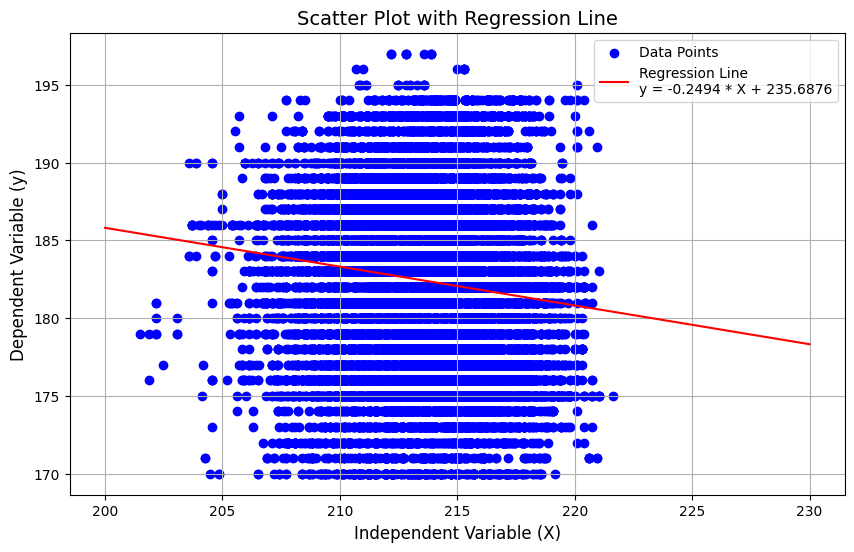

In [27]:
# X_line 생성 (독립 변수의 범위 설정)
X_line = np.linspace(200, 230, 10)

# 회귀식을 통해 Y 값 계산
y_line = coef * X_line + intercept

# 산점도와 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_line, y_line, color='red', label=f'Regression Line\ny = {coef:.4f} * X + {intercept:.4f}')
plt.title('Scatter Plot with Regression Line', fontsize=14)
plt.xlabel('Independent Variable (X)', fontsize=12)
plt.ylabel('Dependent Variable (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 다항 특성 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(dataDF[['scale_pv']])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, dataDF['k_rpm_pv'], test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(f"Coefficients: {model.coef_}, Intercept: {model.intercept_}")


Coefficients: [3766.09895379 -623.06636715], Intercept: -5507.881106670019


In [51]:
dataDF['c_temp_pv'].value_counts().sort_values(ascending=False).head(5)

70.3    4625
70.4    3877
70.2    3689
70.5    2983
70.1    2367
Name: c_temp_pv, dtype: int64

In [53]:
data_col = dataDF.columns

In [58]:
for n in data_col:
    print(dataDF[n].value_counts().sort_values(ascending=False).head(20))

70.3    4625
70.4    3877
70.2    3689
70.5    2983
70.1    2367
70.6    1900
70.0    1804
69.5    1613
70.7    1608
69.4    1513
70.8    1513
69.9    1410
70.9    1369
69.6    1225
69.7    1180
69.8    1137
71.0    1019
71.2     810
69.3     789
71.1     743
Name: c_temp_pv, dtype: int64
187    3140
176    3004
186    2853
188    2851
177    2131
184    2086
175    2004
179    1990
181    1881
189    1701
180    1624
183    1584
182    1447
178    1412
185    1172
190     898
174     776
191     746
193     720
173     605
Name: k_rpm_pv, dtype: int64
67.0    2863
67.2    2792
67.1    2736
66.9    2522
67.3    2376
67.4    2269
66.8    2175
67.5    1994
66.7    1889
67.6    1848
67.7    1383
66.6    1258
67.8    1106
67.9     921
66.5     774
68.0     664
68.1     513
68.9     490
68.5     488
68.6     481
Name: n_temp_pv, dtype: int64
3.04    5352
3.05    5141
3.03    4791
3.06    4007
3.02    3895
3.07    3043
3.01    2799
3.08    2074
3.00    1691
3.09    1293
2.99    1114
3.10    

In [59]:
from sklearn.ensemble import RandomForestRegressor
data = dataDF

# Using additional variables for multivariate regression
X = data[['scale_pv', 'c_temp_pv', 'n_temp_pv', 's_temp_pv']]
y = data['k_rpm_pv']

# Splitting the data again with additional features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model with multiple features
rf_model_multi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_multi.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf_multi = rf_model_multi.predict(X_test)
mse_rf_multi = mean_squared_error(y_test, y_pred_rf_multi)
r2_rf_multi = r2_score(y_test, y_pred_rf_multi)

mse_rf_multi, r2_rf_multi


(34.59580627172676, 0.3749098458669746)

In [61]:
X_test

,scale_pv,c_temp_pv,n_temp_pv,s_temp_pv
99390,3.03,70.3,67.0,66.1
1249,3.08,70.3,69.9,68.2
147469,3.04,69.8,70.7,68.3
155407,3.07,69.5,66.9,67.1
74344,3.00,70.5,67.5,66.1
...,...,...,...,...
135774,3.04,69.9,67.1,67.3
226752,3.07,69.7,67.1,66.7
50108,3.04,70.4,66.6,68.5
142857,3.05,70.3,67.5,66.0


In [62]:
y_test

99390     177
1249      167
147469    167
155407    175
74344     163
         ... 
135774    188
226752    188
50108     170
142857    189
5905      187
Name: k_rpm_pv, Length: 7722, dtype: int64

In [70]:
rf_model_multi.predict([[3.04,	70.4	,66.6	,68.5]])

c:\Users\KDP-14\anaconda3\envs\commate\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([178.0602381])